In [2]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='bbiggs', api_key='jrgs2lfv3u')
import seaborn as sns

# Read in TRAIN data set and select pertinent columns

In [3]:
df = pd.read_csv('data/test_data2.csv', encoding='latin-1')
print(len(df))
df.head()

332


,Title,Prod_Budget,Dom_Gross,World_Gross,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,Lakeview Terrace,20000000,39263506,44821299,2008-09-19,2008.0,9.0,PG-13,110,"Crime, Drama, Thriller",Neil LaBute,"Samuel L. Jackson, Patrick Wilson, Kerry Washi...",291.0
1,Phantasm II,3000000,7000000,7000000,1988-07-08,1988.0,7.0,R,97,"Action, Fantasy, Horror",Don Coscarelli,"James Le Gros, Reggie Bannister, Angus Scrimm,...",34.0
2,They Live,4000000,13000000,13000000,1988-11-04,1988.0,11.0,R,93,"Sci-Fi, Thriller",John Carpenter,"Roddy Piper, Keith David, Meg Foster, George '...",138.0
3,Employee of the Month,10000000,28444855,38364855,2006-10-06,2006.0,10.0,PG-13,103,"Comedy, Romance",Greg Coolidge,"Dane Cook, Jessica Simpson, Dax Shepard, Andy ...",91.0
4,The Transporter Refueled,22000000,16029670,69698495,2015-09-04,2015.0,9.0,PG-13,96,"Action, Crime, Thriller",Camille Delamarre,"Ed Skrein, Ray Stevenson, Loan Chabanol, Gabri...",265.0


# Convert dates to datetime objects

In [4]:
df['Released'] = pd.to_datetime(df['Released'])
df['Year'] = pd.DatetimeIndex(df['Released']).year
df['Month'] = pd.DatetimeIndex(df['Released']).month
df.head()

,Title,Prod_Budget,Dom_Gross,World_Gross,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,Lakeview Terrace,20000000,39263506,44821299,2008-09-19,2008,9,PG-13,110,"Crime, Drama, Thriller",Neil LaBute,"Samuel L. Jackson, Patrick Wilson, Kerry Washi...",291.0
1,Phantasm II,3000000,7000000,7000000,1988-07-08,1988,7,R,97,"Action, Fantasy, Horror",Don Coscarelli,"James Le Gros, Reggie Bannister, Angus Scrimm,...",34.0
2,They Live,4000000,13000000,13000000,1988-11-04,1988,11,R,93,"Sci-Fi, Thriller",John Carpenter,"Roddy Piper, Keith David, Meg Foster, George '...",138.0
3,Employee of the Month,10000000,28444855,38364855,2006-10-06,2006,10,PG-13,103,"Comedy, Romance",Greg Coolidge,"Dane Cook, Jessica Simpson, Dax Shepard, Andy ...",91.0
4,The Transporter Refueled,22000000,16029670,69698495,2015-09-04,2015,9,PG-13,96,"Action, Crime, Thriller",Camille Delamarre,"Ed Skrein, Ray Stevenson, Loan Chabanol, Gabri...",265.0


In [5]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

df_a = df[['Prod_Budget', 'Year', 'Month', 'Total_Torrents']]

fig = FF.create_scatterplotmatrix(df_a, diag='box', index='Prod_Budget',
                                  colormap='Portland', colormap_type='seq',
                                  endpts=[-1, 0, 1],
                                  height=800, width=800, size=12,
                                  marker=dict(symbol=25))
py.iplot(fig, filename = 'Partition Numeric Data into Intervals')

In [6]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

df_a = df[['Prod_Budget', 'Year', 'Month', 'Total_Torrents']]
fig = FF.create_scatterplotmatrix(df_a, diag='histogram', index='Prod_Budget',
                                  height=800, width=800)
py.iplot(fig, filename='Histograms along Diagonal Subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



In [7]:
# look at current data set AFTER year cutoff
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_yr)

NameError: name 'df_yr' is not defined

In [8]:
# unique list of grouped genres as strings
unq_genres = df_yr['Genre'].unique()
unq_genres = unq_genres.tolist()

#print(len(unq_genres))
#print(unq_genres[:10])

# unique list of grouped genres as lists
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)

#print(len(lst_grp_genres))
#print(lst_grp_genres)

NameError: name 'df_yr' is not defined

In [9]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

#print(len(ind_genre))
#print(ind_genre)

NameError: name 'unq_genres' is not defined

In [10]:
from patsy import dmatrices
patsy_formula = 'Total_Torrents ~ Prod_Budget + Year + Genre_Single'
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

NameError: name 'df_sub' is not defined

In [45]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     245.9
Date:                Fri, 15 Jul 2016   Prob (F-statistic):          2.09e-159
Time:                        10:16:12   Log-Likelihood:                -5006.2
No. Observations:                 812   AIC:                         1.002e+04
Df Residuals:                     806   BIC:                         1.005e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                 -4.461e+04   1769.933    -25.205      0.000     -4.81e+04 -4.11e+04
Genre_Single[T.Adventure]   -83.9253     27.968     -3.001      0.003      -138.825   -29.026
Genre_Single[T.Comedy]      -96.9206     12.151     -7.976      0.000      -120.772   -73.069
Genre_Single[T.Drama]       -59.5208     12.595     -4.726      0.000       -84.244   -34.797
Prod_Budget                1.566e-06   9.88e-08     15.851      0.000      1.37e-06  1.76e-06
Year                         22.3358      0.882     25.317      0.000        20.604    24.068
==============================================================================
Omnibus:                      137.527   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.609
Skew:                           0.886   Prob(JB):                     2.00e-76
Kurtosis:                       5.676   Cond. No.                     3.08e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
mod_lr_score = model.score(x, y)
mod_lr_coef = model.coef_

In [1]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)
model.summary
# store results
mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
cv_mod_score = model.score(x_train, y_train)

NameError: name 'x' is not defined

In [48]:
# reset x, y otherwise errors occur
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
cvKf_mod_score = clf2.score(x,y)

In [49]:
#NORMAL RESULTS
print('Model Linear Regression Score = {0}'.format(mod_lr_score))
print('            Mean Square Error = {0}'.format(mean_sq_err))
print(' Cross Validation Model Score = {0}'.format(cv_mod_score))
print('     Mean Squred Error K-Fold = {0}'.format(mean_sq_errKf))
print('Cross Val. K-Fold Model Score = {0}'.format(cvKf_mod_score))

Model Linear Regression Score = 0.6040207184539521
            Mean Square Error = 13255.981394370103
 Cross Validation Model Score = 0.6023914268766934
     Mean Squred Error K-Fold = 13390.435101340325
Cross Val. K-Fold Model Score = 0.6039762636127388


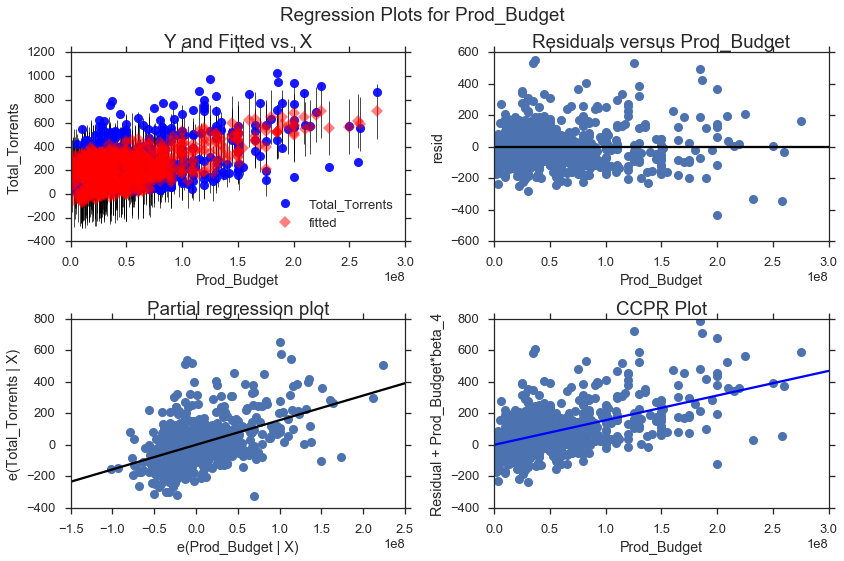

In [50]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'Prod_Budget', fig=fig)

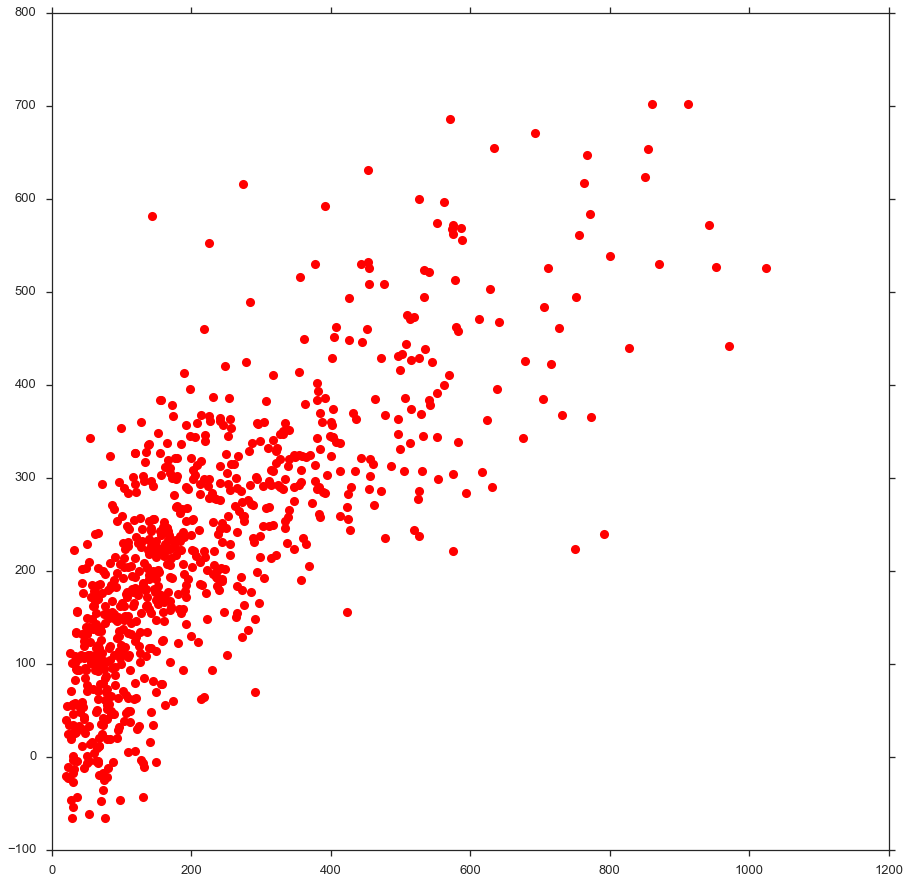

In [51]:
_ = plt.plot(y, model.predict(x), 'ro')

---
# Log Transform

In [52]:
df.columns

Index(['Title', 'Prod_Budget', 'Released', 'Year', 'Month', 'Rated', 'Runtime',
       'Genre', 'Director', 'Actors', 'Total_Torrents'],
      dtype='object')

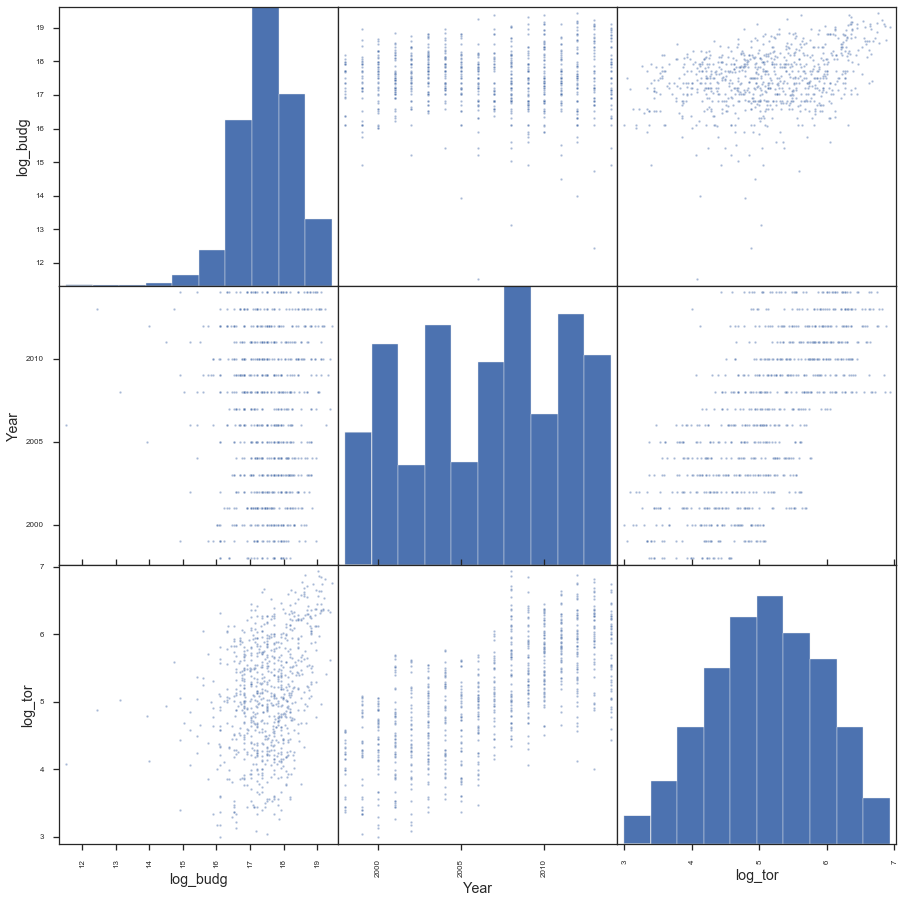

In [53]:
df_sub['log_budg']=np.log(df_sub.Prod_Budget)
#df_sub['log_year']=np.log(df_sub.Year)
#df_sub['log_run']=np.log(df_sub.Runtime)
df_sub['log_tor']=np.log(df_sub.Total_Torrents)

trans = df_sub[['log_budg', 'Year', 'log_tor']]
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(trans)

In [54]:
log_patsy_formula = 'log_tor ~ log_budg + Year + Genre_Single'
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

In [55]:
import statsmodels.formula.api as smf
results = smf.ols(formula=log_patsy_formula, data=df_sub,).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tor   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     275.8
Date:                Fri, 15 Jul 2016   Prob (F-statistic):          9.06e-172
Time:                        10:16:50   Log-Likelihood:                -598.39
No. Observations:                 812   AIC:                             1209.
Df Residuals:                     806   BIC:                             1237.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                  -243.2689      7.746    -31.407      0.000      -258.473  -228.065
Genre_Single[T.Adventure]    -0.2497      0.122     -2.048      0.041        -0.489    -0.010
Genre_Single[T.Comedy]       -0.4982      0.053     -9.442      0.000        -0.602    -0.395
Genre_Single[T.Drama]        -0.2787      0.055     -5.101      0.000        -0.386    -0.171
log_budg                      0.2583      0.021     12.158      0.000         0.217     0.300
Year                          0.1217      0.004     31.588      0.000         0.114     0.129
==============================================================================
Omnibus:                        6.785   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.813
Skew:                          -0.224   Prob(JB):                       0.0332
Kurtosis:                       2.998   Cond. No.                     8.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# store results
log_mod_lr_score = model.score(x,y)

In [57]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
log_mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cv_mod_score = model.score(x_train, y_train)

In [58]:
# reset x, y otherwise errors occur
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
log_mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cvKf_mod_score = clf2.score(x,y)

In [59]:
#LOG RESULTS
print('Log Model Linear Regression Score = {0}'.format(log_mod_lr_score))
print('            Log Mean Square Error = {0}'.format(log_mean_sq_err))
print(' Log Cross Validation Model Score = {0}'.format(log_cv_mod_score))
print('     Log Mean Squred Error K-Fold = {0}'.format(log_mean_sq_errKf))
print('Log Cross Val. K-Fold Model Score = {0}'.format(log_cvKf_mod_score))

Log Model Linear Regression Score = 0.6310883914653996
            Log Mean Square Error = 0.24651528811136103
 Log Cross Validation Model Score = 0.6410213030729475
     Log Mean Squred Error K-Fold = 0.25022641720858635
Log Cross Val. K-Fold Model Score = 0.6303238660429156


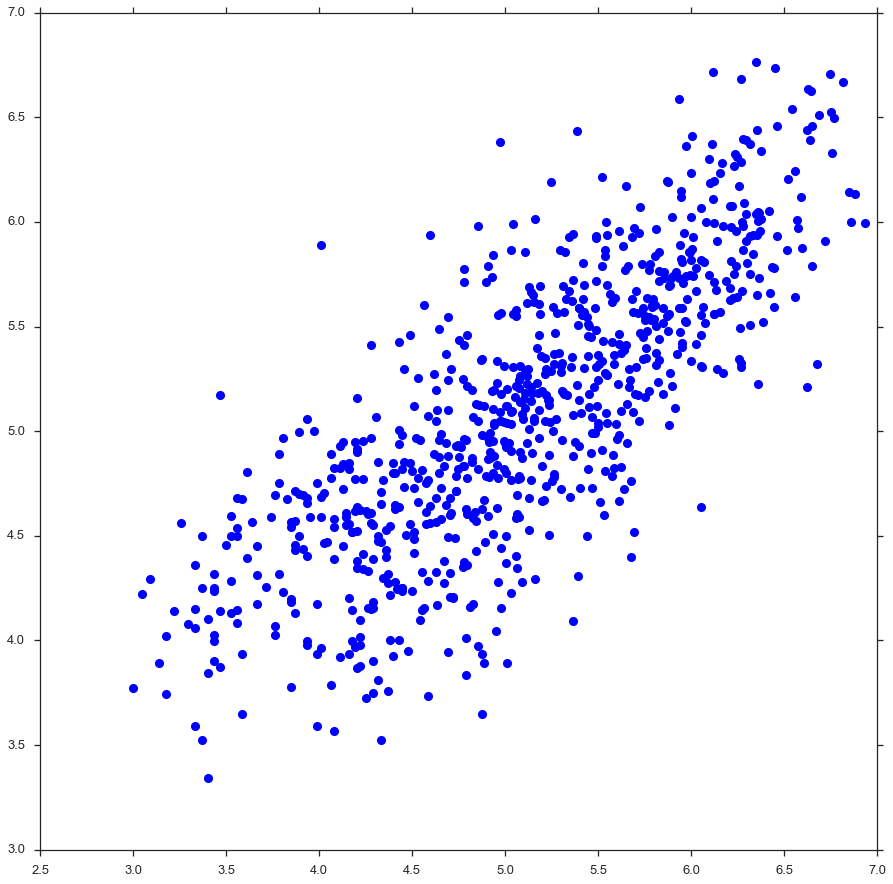

In [60]:
_ = plt.plot(y, model.predict(x), 'bo')

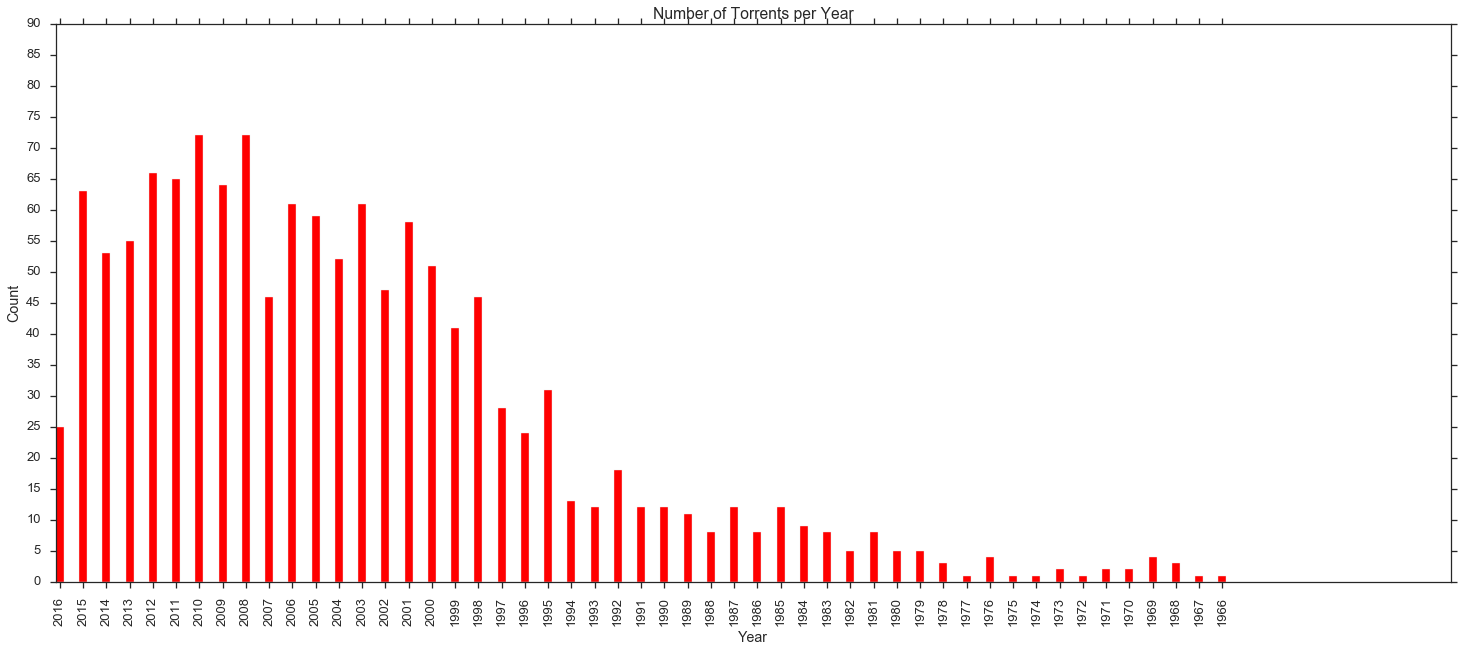

In [61]:
plt.figure(figsize=(25,10))

ind = np.arange(len(yr_dict))
width = 0.35

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')
plt.xticks(ind + width/2., (bar_year), rotation='vertical')
plt.yticks(np.arange(0, 91, 5))

plt.show()

In [62]:
#log_tor ~ log_budg + Year + Month + log_run + Genre_Single'

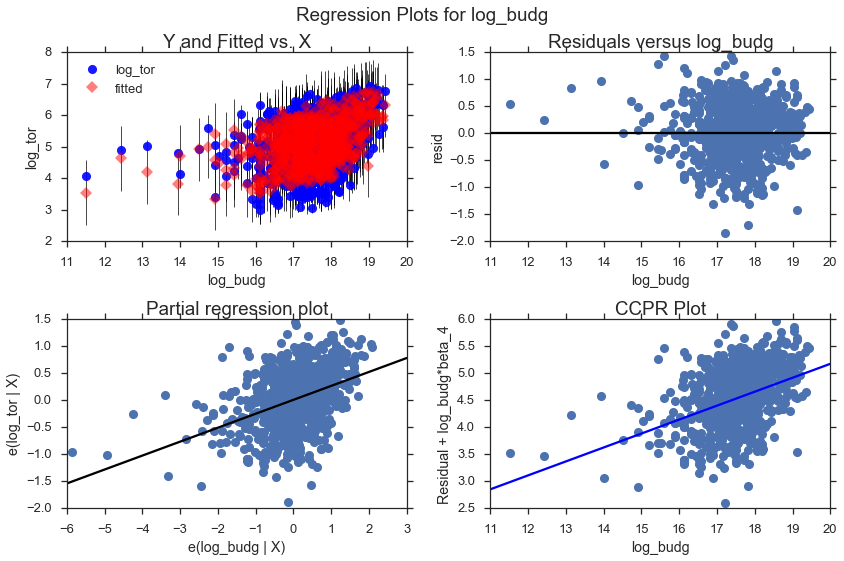

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'log_budg', fig=fig)

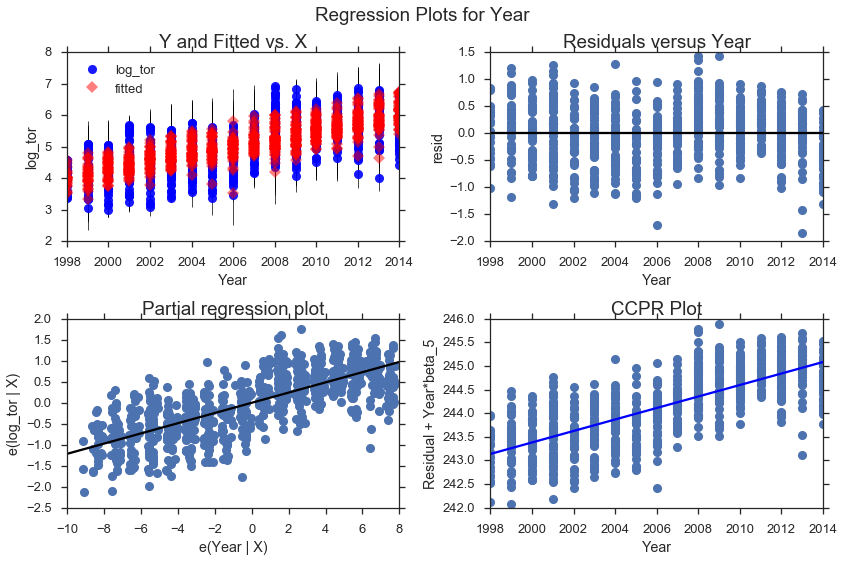

In [64]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'Year', fig=fig)

In [66]:
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_regress_exog(results,'Month', fig=fig)

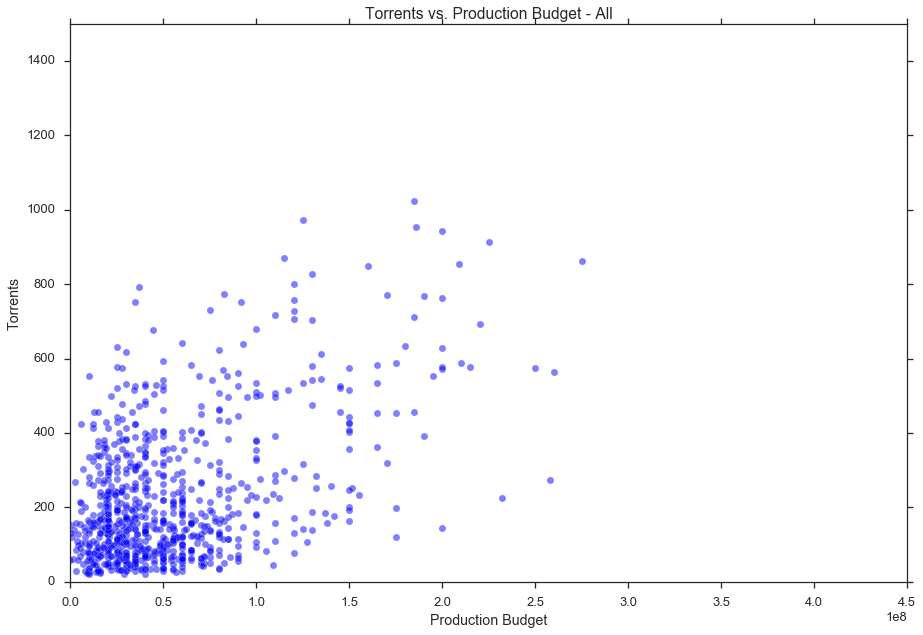

In [71]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df_sub['Prod_Budget'], df_sub['Total_Torrents'], alpha=0.5, s=50)

In [10]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

df_yr = df[['Prod_Budget', 'Year', 'Month', 'Total_Torrents']]
fig = FF.create_scatterplotmatrix(df_sub, diag='histogram', index='Prod_Budget',
                                  height=800, width=800)
py.iplot(fig, filename='Histograms along Diagonal Subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]

